In [1]:
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_unweighted

import sys; sys.path.append('..')
import config as cfg

### Load Vogelstein and Park gene info

In [2]:
vogelstein_genes = '/'.join([
    cfg.vogelstein_base_url,
    cfg.vogelstein_commit,
    'data',
    'vogelstein_cancergenes.tsv'
])
print(vogelstein_genes)

https://github.com/greenelab/pancancer/raw/2a0683b68017fb226f4053e63415e4356191734f/data/vogelstein_cancergenes.tsv


In [3]:
vogelstein_df = (
    pd.read_csv(vogelstein_genes, sep='\t')
      .rename(columns={'Gene Symbol'   : 'gene',
                       'Classification*': 'classification'})
)
vogelstein_df.head()

,gene,Gene Name,# Mutated Tumor Samples**,Ocogene score*,Tumor Suppressor Gene score*,classification,Core pathway,Process
0,ABL1,"c-abl oncogene 1, receptor tyrosine kinase",851,0.926904,0.003046,Oncogene,Cell Cycle/Apoptosis,Cell Survival
1,ACVR1B,"activin A receptor, type IB",17,0.000000,0.423077,TSG,TGF-b,Cell Survival
2,AKT1,v-akt murine thymoma viral oncogene homolog 1,155,0.929487,0.006410,Oncogene,PI3K,Cell Survival
3,ALK,anaplastic lymphoma receptor tyrosine kinase,189,0.720000,0.010000,Oncogene,PI3K; RAS,Cell Survival
4,APC,adenomatous polyposis coli,2561,0.024553,0.917222,TSG,APC,Cell Fate


In [4]:
park_loss_df = pd.read_csv(cfg.data_dir / 'park_loss_df.tsv', sep='\t')
park_loss_df.head()

,Pair,Gene,Tissue,Effect,Pval,FDR,LogFDR,Target
0,AJUBA_HNSC,AJUBA,HNSC,-0.936050,8.732955e-03,0.045816,1.338886,A_Hit
1,ARID1A_LGG,ARID1A,LGG,-0.904202,1.956617e-02,0.076291,1.117471,A_Hit
2,ARID1A_STAD,ARID1A,STAD,1.133548,3.979932e-04,0.000294,3.517309,B_Target
3,ARID1A_UCEC,ARID1A,UCEC,1.597876,3.451937e-07,0.000000,5.000000,B_Target
4,ARID2_LIHC,ARID2,LIHC,-0.978419,1.019284e-02,0.050276,1.298552,A_Hit


In [5]:
park_gain_df = pd.read_csv(cfg.data_dir / 'park_gain_df.tsv', sep='\t')
park_gain_df.head()

,Pair,Gene,Tissue,Effect,Pval,FDR,LogFDR,Target
0,ARID1A_UCEC,ARID1A,UCEC,-2.351526,1.154365e-03,-0.000447,3.340299,B_Target
1,ATRX_LGG,ATRX,LGG,1.440987,4.025141e-08,0.000000,5.000000,A_Hit
2,BRAF_SKCM,BRAF,SKCM,1.239939,2.042839e-11,0.000000,5.000000,A_Hit
3,BRAF_THCA,BRAF,THCA,-2.449684,7.509064e-04,-0.000209,3.659041,B_Target
4,CTNNB1_UCEC,CTNNB1,UCEC,-1.257861,1.597968e-02,0.096292,1.016366,B_Target


### Look at overlap between Park and Vogelstein genes

In [6]:
sns.set_style('white')

park_loss_genes = set(park_loss_df.Gene.unique())
vogelstein_genes = set(vogelstein_df.gene.unique())

venn2_unweighted([park_loss_genes, vogelstein_genes], ['Park (loss)', 'Vogelstein'])
plt.title('Park/Vogelstein gene set overlap')

In [8]:
print(len(park_loss_genes - vogelstein_genes))
print(park_loss_genes - vogelstein_genes)

15
{'BRD7', 'ZNF750', 'KEAP1', 'PTPDC1', 'CTCF', 'AJUBA', 'ZFHX3', 'CUL3', 'FAT1', 'SIN3A', 'PSIP1', 'MAP2K4', 'TSC2', 'NSD1', 'EPAS1'}


Text(0.5, 1.0, 'Park/Vogelstein gene set overlap')

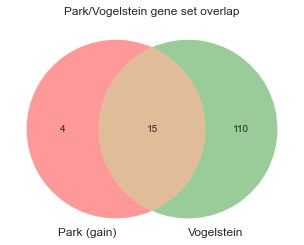

In [7]:
sns.set_style('white')

park_gain_genes = set(park_gain_df.Gene.unique())
vogelstein_genes = set(vogelstein_df.gene.unique())

venn2_unweighted([park_gain_genes, vogelstein_genes], ['Park (gain)', 'Vogelstein'])
plt.title('Park/Vogelstein gene set overlap')

In [9]:
print(len(park_gain_genes - vogelstein_genes))
print(park_gain_genes - vogelstein_genes)

4
{'ERBB4', 'KMT2B', 'EPAS1', 'CUL3'}
